# Project: Predicting Neurodegenerative Diseases 

#### Using Parkinsons Dataset from UCI Machine Learning Repository

#### In the dataset, there are two categories as indicated in the status column of the DataFrame, which indicates 1 as patient has parkinson's disease and 0 as patient who is healthy.

# Task 1. Explore the dataset and gain insights

In [1]:
#Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

plt.style.use('ggplot')

In [2]:
#Read dataset

parkinsons_data = pd.read_csv("parkinsons.data")

In [3]:
#Print dataframe's head to view dataframe's content
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
#Print the dataframe's info to check for data quality
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [5]:
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


##### From the DataFrame's information, there are no missing data

## Questions for Exploratory Data Analysis

### 1. Does the MDVP:Flo correlates with the Status of patients?

In [6]:
#Check the pearson correlation between the two variables

MDVP_lo_Status, _ = pearsonr(parkinsons_data["MDVP:Fo(Hz)"], parkinsons_data["status"])

In [7]:
print(MDVP_lo_Status)

-0.38353515118798426


#### This value shows a weak negative correlation between the two variables. These variables move in opposite directions with MDVP:Fo(Hz) (Average vocal fundamental frequency) going in an opposite direction to the Status. Thus if MDVP:Fo(Hz) increases, status decreases (from 1 to 0) and if MDVP:Fo(Hz) decreases, status increases from (0 to 1)

### Thus higher values of MDVP:Fo(Hz) indicates lesser values of status i.e. healthy patients, thus healthy patients have low MDVP:Fo(Hz)

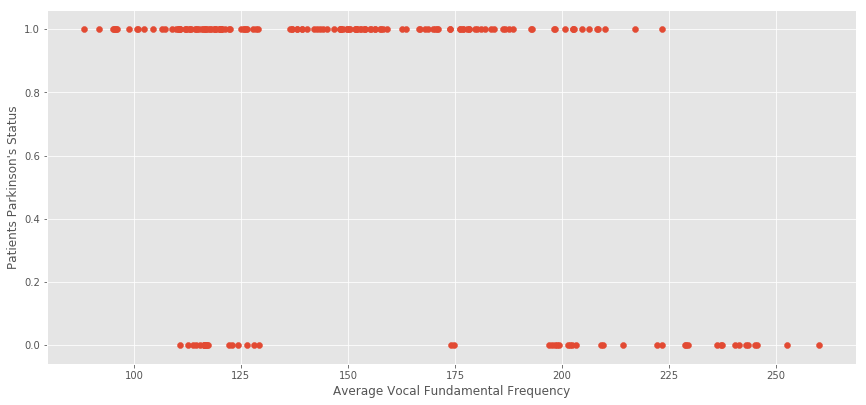

In [8]:
fig, ax = plt.subplots()

fig.set_size_inches(14.5, 6.5)
ax.scatter(parkinsons_data["MDVP:Fo(Hz)"], parkinsons_data["status"], marker="o")
ax.set_xlabel("Average Vocal Fundamental Frequency")
ax.set_ylabel("Patients Parkinson's Status")
plt.show()

### Notice how patients with  Average Vocal Fundamental Frequency (Hz) higher than 190 fall into the categories of those who are healthy while those below 190 are largely grouped among patients with Parkinson's disease.

### Thus at higher values of MDVP:Fo(Hz) there are lesser patients whose status indicate Parkinson's disease and more patients who are healthier

### 2. Does the jitter percentage of patients indicates their status?

In [9]:
# The jitter is affected mainly by the lack of control of vibration of the cords; 
# the voices of patients with pathologies often have a higher percentage of jitter. 

# We will seperate the dataset into two based off the status of patients and see the average differences in jitter percentage
# between the two categories


# Create a boolean mask based of status for parkinson's dataset

parkinsons_patients_bool_mask = parkinsons_data["status"] == 1

In [10]:
parkinsons_patients = parkinsons_data[parkinsons_patients_bool_mask]

healthy_patients = parkinsons_data[~parkinsons_patients_bool_mask]

In [11]:
print("Number of Parkinson's disease patients: %f" % (len(parkinsons_patients)))

print("Number of Healthy (Non-Parkinson's disease) patients: %f" % (len(healthy_patients)))

Number of Parkinson's disease patients: 147.000000
Number of Healthy (Non-Parkinson's disease) patients: 48.000000


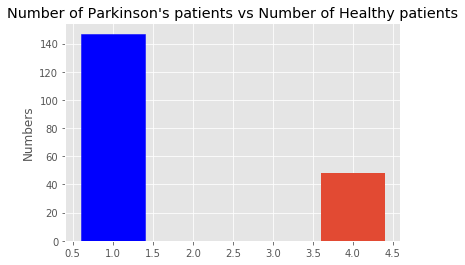

In [12]:
#Display the number differences in a bar plot
fig, ax = plt.subplots()

patients_numbers = ax.bar([1,4], [len(parkinsons_patients), len(healthy_patients)])
ax.set(title="Number of Parkinson's patients vs Number of Healthy patients", ylabel="Numbers")
patients_numbers[0].set_color('b')
plt.show()

#### The blue colored bar represents the number of patients with parkinson's disease while the blue colored bar represents the number of patients who are healthy.

In [13]:
# Take the mean difference of the jitter percentage between the two categories to see if jitter percentage 
# indicates patients with pathologies relating to parkinson's disease

parkinsons_patients_jitter_perc_mean = parkinsons_patients['MDVP:Jitter(%)'].mean()
healthy_patients_jitter_perc_mean = healthy_patients['MDVP:Jitter(%)'].mean()

print("Mean jitter percentage value for parkinson's disease patients: %f" % (parkinsons_patients_jitter_perc_mean))
print("Mean jitter percentage value for healthy (Non-parkinson's) disease patients: %f" % (healthy_patients_jitter_perc_mean))

Mean jitter percentage value for parkinson's disease patients: 0.006989
Mean jitter percentage value for healthy (Non-parkinson's) disease patients: 0.003866


#### Notice that the mean jitter percentage for patients with parkinsons disease is almost twice as high than those who are non- parkinson's disease patients i.e. healthy patients.

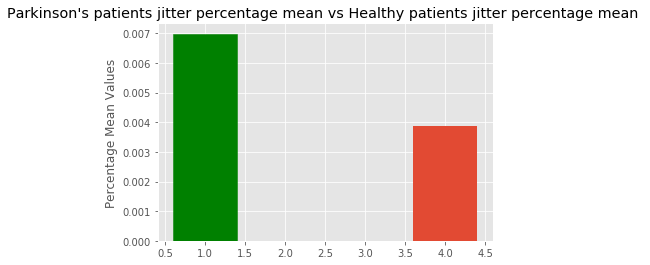

In [14]:
#Display the mean number differences in a bar plot
fig, ax = plt.subplots()

patients_numbers = ax.bar([1,4], [parkinsons_patients_jitter_perc_mean, healthy_patients_jitter_perc_mean])
ax.set(title="Parkinson's patients jitter percentage mean vs Healthy patients jitter percentage mean ", 
       ylabel="Percentage Mean Values")
patients_numbers[0].set_color('g')
plt.show()

#### The green colored bar represents the mean jitter percentage of patients with parkinson's disease while the red colored bar represents represents the mean jitter percentage of healthy patients.

### Patients with higher percentage of jitter MDVP:Jitter(%) indicate early stages of Parkinson's disease

### 3. What does the Harmonics-To-Noise Ratio say about the two categories of patients

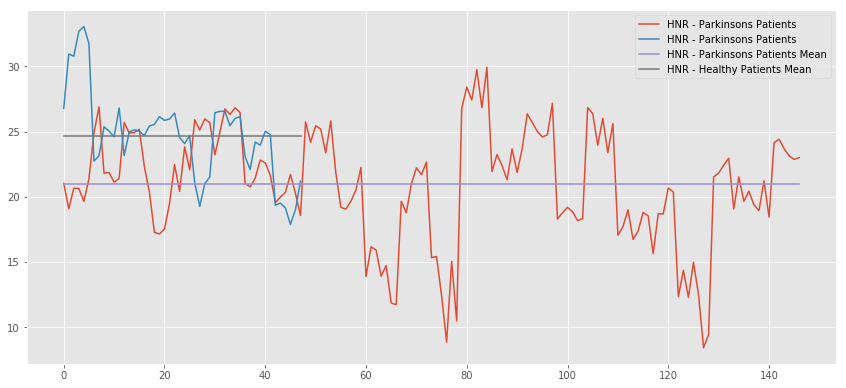

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(14.5, 6.5)

# Plot the HNR values for Parkinsons Patients
ax.plot(np.arange(len(parkinsons_patients["HNR"])), parkinsons_patients["HNR"], label="HNR - Parkinsons Patients")

# Plot the HNR values for Healthy Patients
ax.plot(np.arange(len(healthy_patients["HNR"])), healthy_patients["HNR"], label="HNR - Parkinsons Patients")

# Plot the Mean of HNR values for Parkinsons Patients
ax.plot(np.arange(len(parkinsons_patients["HNR"])), np.repeat(parkinsons_patients["HNR"].mean(), len(parkinsons_patients["HNR"])), label="HNR - Parkinsons Patients Mean")

# Plot the Mean of HNR values for Parkinsons Patients
ax.plot(np.arange(len(healthy_patients["HNR"])), np.repeat(healthy_patients["HNR"].mean(), len(healthy_patients["HNR"])), label="HNR - Healthy Patients Mean")

plt.legend()
plt.show()

#### From the Plot above, we can see that the average mean HNR value for a healthy patient is higher than that of a patient with parkinson's disease. 

### Lower HNR values indicate asthenic voice and dysphonia which are symptoms of parkinson's disease

# Task 2. Build A Supervised Learning Model that predicts the presence of a neurodegenerative disease in an individual.


### Using XGBoost Classifier as this problem is a binary classification problem, target variable i.e. status being either True: 1 or False: 0.

### The first graph in this notebook shows us that the problem follows a logistic regression model

In [16]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [17]:
# Drop the name column as it is irrelevant to the classification problem
parkinsons_data.drop("name", 1, inplace=True)

# Create the features and target variables

X = parkinsons_data.drop("status", 1)

# Convert the target variable into a category 1:true - Parkinson's disease patient, 0:false - Healthy patient
y = parkinsons_data["status"].astype("bool")

In [18]:
#Split features and target variables into training and test variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

#Instantiate the XGBRegressor: xg_reg
xg_cl = xgb.XGBClassifier(objective='binary:logistic', max_depth=3, n_estimators=10, seed=123)


#Fit the regressor to the training set
xg_cl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=10, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=123, silent=None,
       subsample=1, verbosity=1)

In [19]:
#Predict the labels of the test set
preds = xg_cl.predict(X_test)

#Compute the accuracy
accuracy = float(np.sum(preds == y_test))/y_test.shape[0]


print("accuracy: %f" % (accuracy))

accuracy: 0.948718


#### Our XGBoost Classifier gives us an accuracy of approx. 95%